### Import Packages

In [1]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette("tab10")

import random as rnd
import numpy as np
rnd.seed(0)
np.random.seed(0)

import scipy.stats as stats
import bayes_logistic

from utils import *

### Gaussian Prior

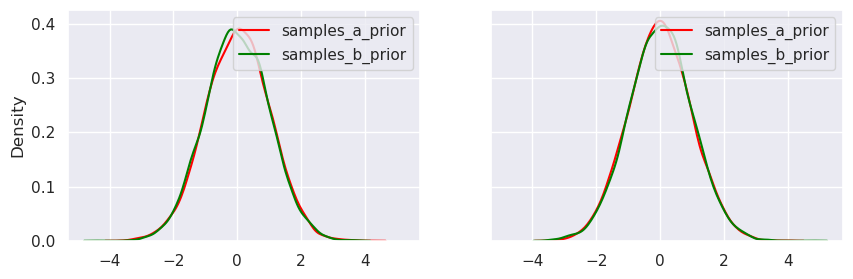

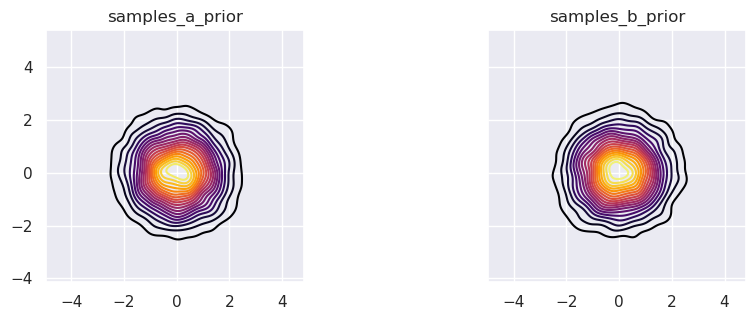

In [57]:
# num_samples 
num_samples = 10000

# weights prior distribution parameters
weights_prior_params = [
    [0.0, 0.0], [[1.0, 0.0], [0.0, 1.0]]]

# generate samples A of weights prior
samples_a_weights_prior = stats.multivariate_normal.rvs(
    weights_prior_params[0], weights_prior_params[1], 
    size=(num_samples), random_state=1)

# generate samples B of weights prior
samples_b_weights_prior = stats.multivariate_normal.rvs(
    weights_prior_params[0], weights_prior_params[1], 
    size=(num_samples), random_state=11)

# Visualize the generated prior and posterior samples, individual features
nrows = 2
fig, axes = plt.subplots(nrows=1, ncols=nrows, sharex=True, sharey=True, figsize=(10,3))
axes = axes.flatten()

for i in range(nrows):
    sns.kdeplot(samples_a_weights_prior[:,i], fill=False, color="red", label="samples_a_prior", ax=axes[i])
    sns.kdeplot(samples_b_weights_prior[:,i], fill=False, color="green", label="samples_b_prior", ax=axes[i])
    axes[i].legend(loc="upper right")
plt.show()

# Visualize the generated prior and posterior samples, pair of features
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,3))
axes = axes.flatten()

sns.kdeplot(x=samples_a_weights_prior[:,0], y=samples_a_weights_prior[:,1], n_levels=20, 
            cmap="inferno", fill=False, ax=axes[0])

sns.kdeplot(x=samples_b_weights_prior[:,0], y=samples_b_weights_prior[:,1], n_levels=20, 
            cmap="inferno", fill=False, ax=axes[1])

axes[0].set_aspect(aspect="equal")
axes[1].set_aspect(aspect="equal")
axes[0].set_title("samples_a_prior")
axes[1].set_title("samples_b_prior")
fig.tight_layout(pad=0.00, h_pad=0, w_pad=0)
plt.show()

### Mixture of Gaussian Priors

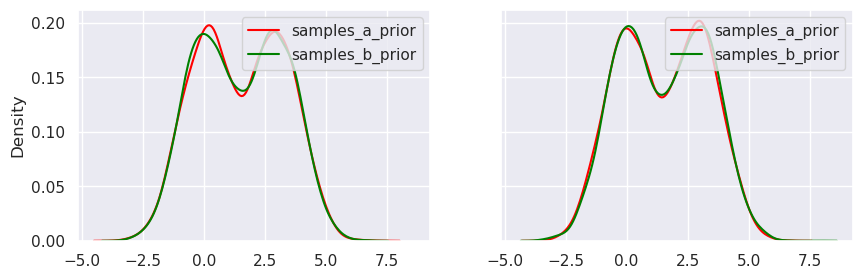

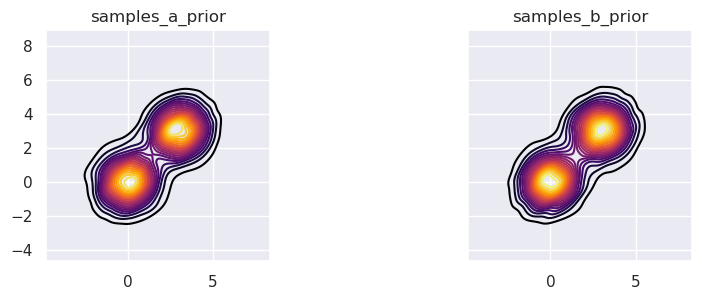

In [58]:
# num_samples 
num_samples = 10000

# weights prior distribution parameters
weights_prior_params = [
    [[0.0, 0.0], [[1.0, 0.0], [0.0, 1.0]]],
    [[3.0, 3.0], [[1.0, 0.0], [0.0, 1.0]]]]
mix_weights = [0.5, 0.5]

# generate samples A of weights prior
samples_a_weights_prior = np.concatenate([stats.multivariate_normal.rvs(
    mu, cov, size=(num_samples), random_state=1)[:,:,None] \
        for mu, cov in weights_prior_params], axis=-1)
samples_a_mixture = stats.multinomial.rvs(1, mix_weights, size=(num_samples), random_state=1)[:,None,:]
samples_a_weights_prior = np.sum(np.multiply(samples_a_weights_prior, samples_a_mixture), axis=-1)

# generate samples B of weights prior
samples_b_weights_prior = np.concatenate([stats.multivariate_normal.rvs(
    mu, cov, size=(num_samples), random_state=11)[:,:,None] \
        for mu, cov in weights_prior_params], axis=-1)
samples_b_mixture = stats.multinomial.rvs(1, mix_weights, size=(num_samples), random_state=11)[:,None,:]
samples_b_weights_prior = np.sum(np.multiply(samples_b_weights_prior, samples_b_mixture), axis=-1)

# Visualize the generated prior and posterior samples, individual features
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,3))
axes = axes.flatten()

for i in range(2):
    sns.kdeplot(samples_a_weights_prior[:,i], fill=False, color="red", label="samples_a_prior", ax=axes[i])
    sns.kdeplot(samples_b_weights_prior[:,i], fill=False, color="green", label="samples_b_prior", ax=axes[i])
    axes[i].legend(loc="upper right")
plt.show()

# Visualize the generated prior and posterior samples, pair of features
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,3))
axes = axes.flatten()

sns.kdeplot(x=samples_a_weights_prior[:,0], y=samples_a_weights_prior[:,1], n_levels=20, 
            cmap="inferno", fill=False, ax=axes[0])

sns.kdeplot(x=samples_b_weights_prior[:,0], y=samples_b_weights_prior[:,1], n_levels=20, 
            cmap="inferno", fill=False, ax=axes[1])

axes[0].set_aspect(aspect="equal")
axes[1].set_aspect(aspect="equal")
axes[0].set_title("samples_a_prior")
axes[1].set_title("samples_b_prior")
# plt.tight_layout()
plt.show()